Please upload an image file (e.g., jpg, png):


Saving rgb_dog.jpg to rgb_dog (1).jpg
Output saved as reduced_intensity_64_levels.jpg


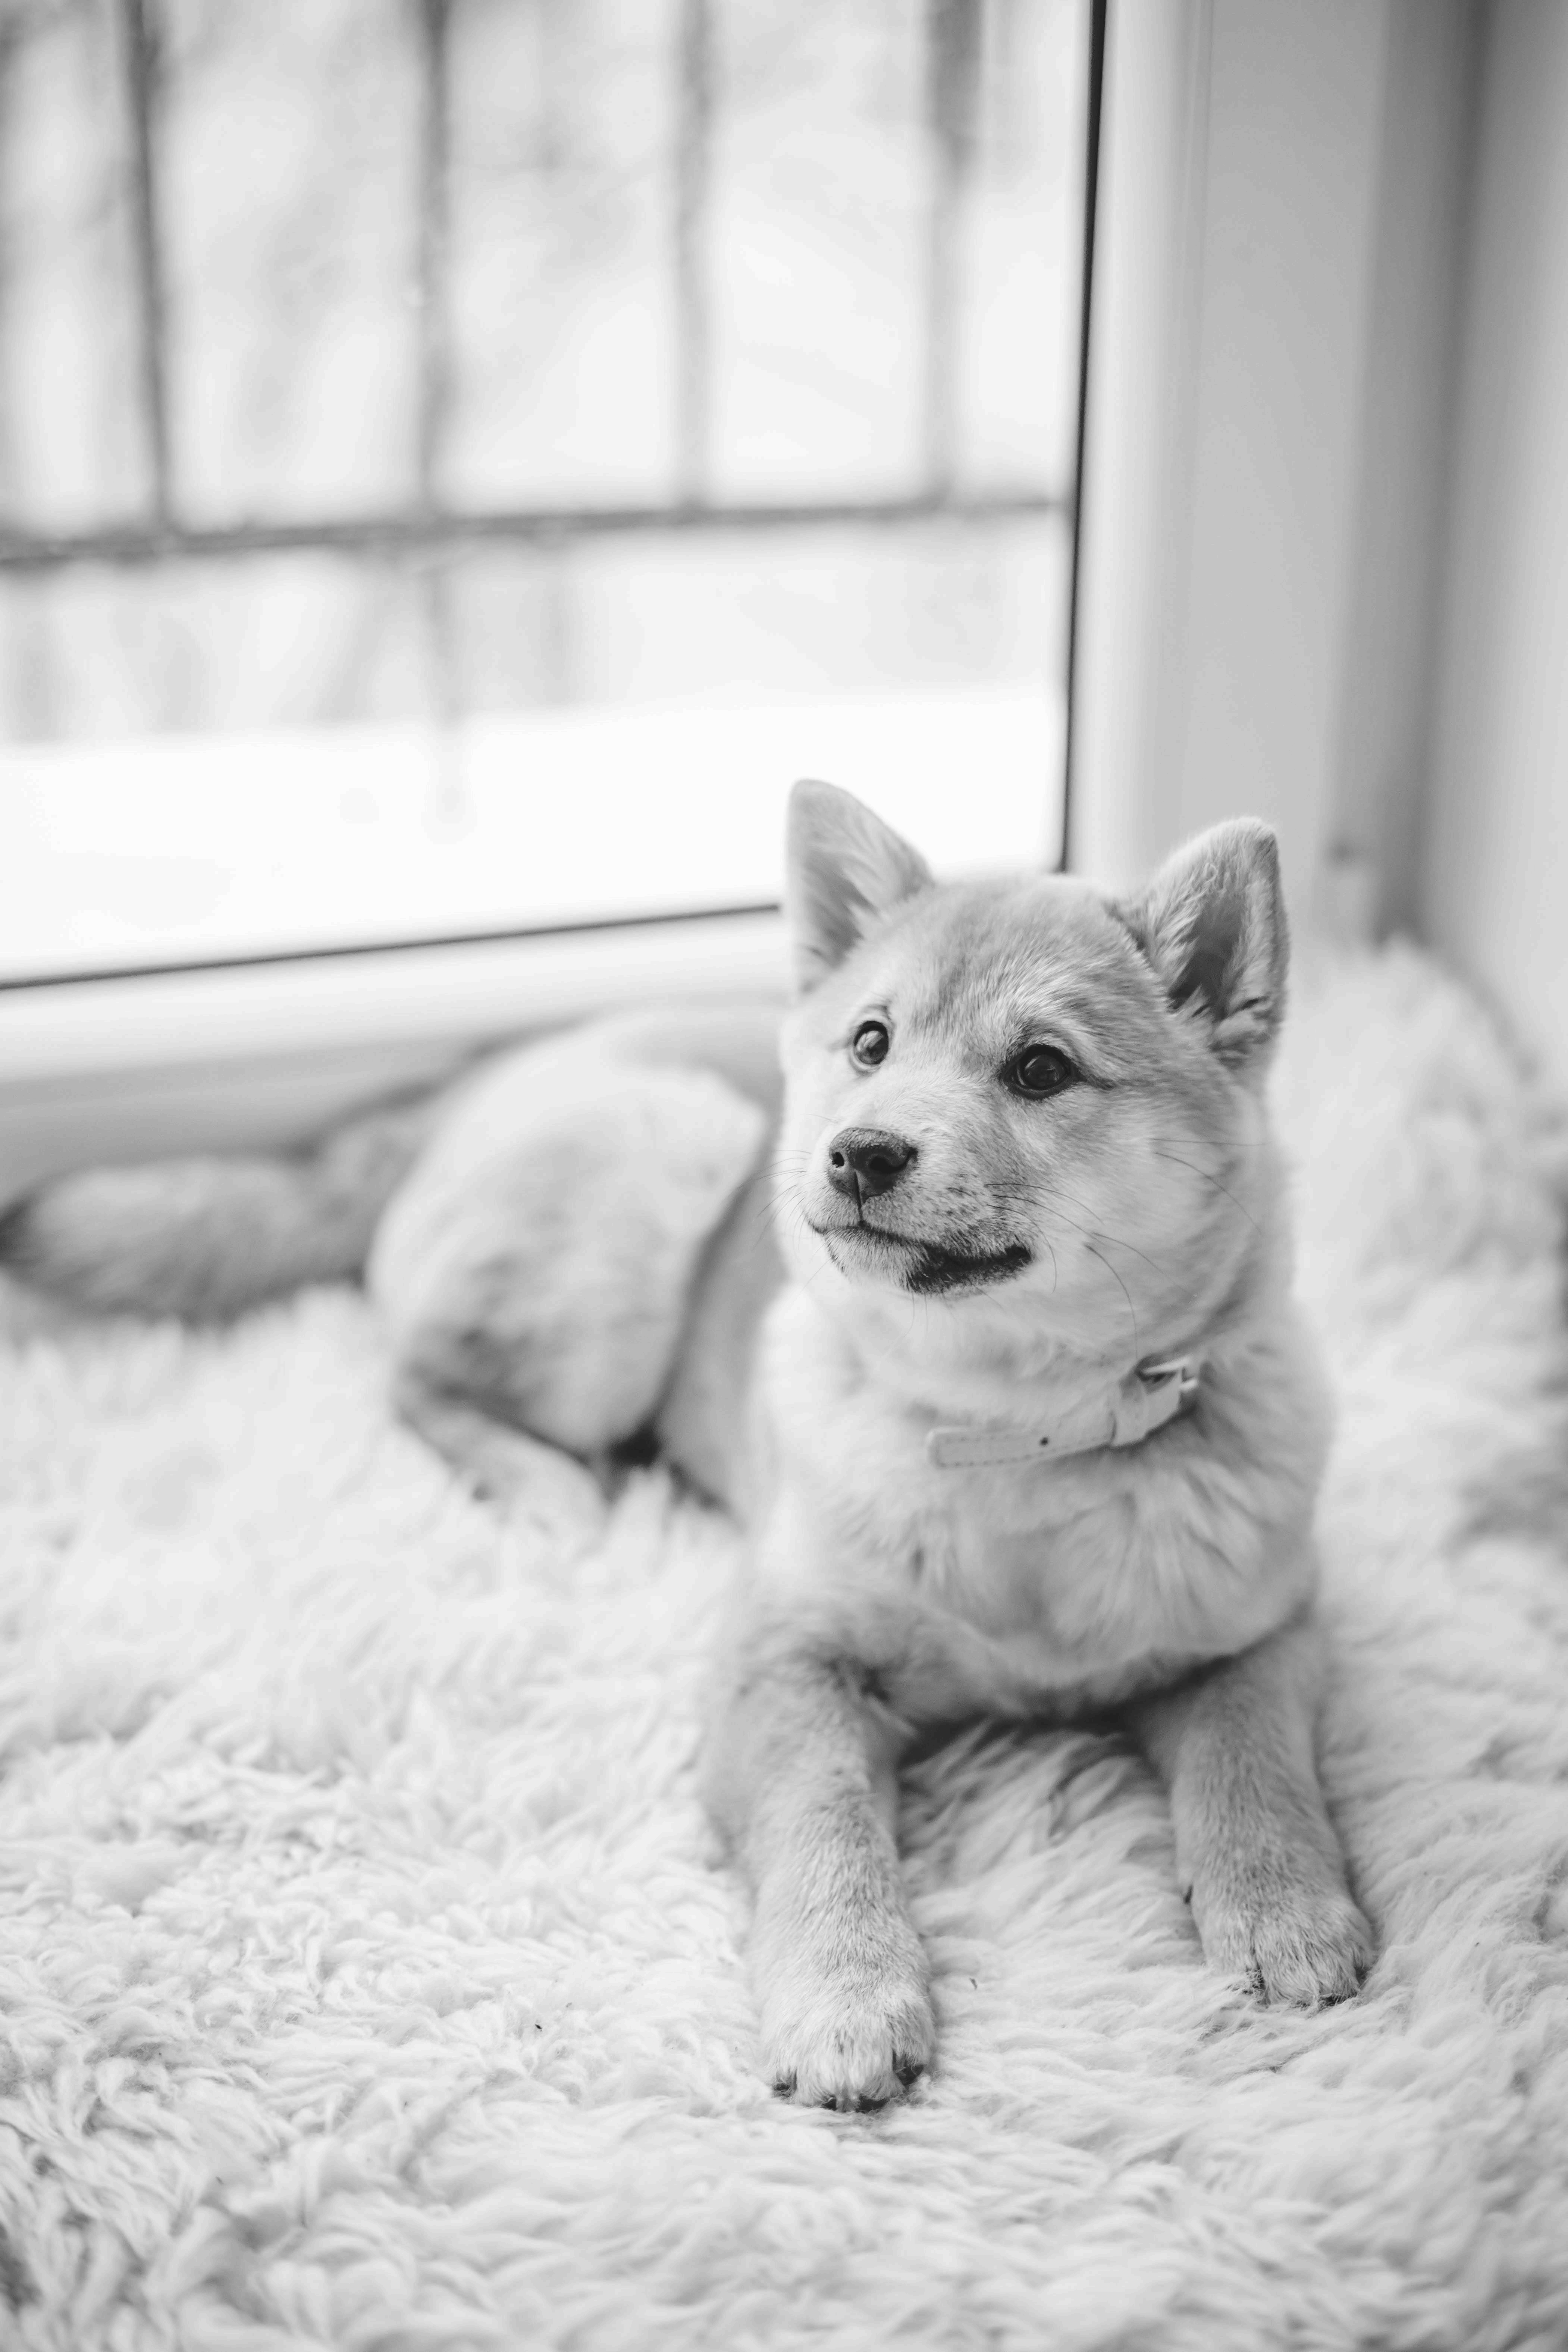

In [12]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files
import io

def reduce_intensity_levels(image, levels):
    """
    Reduce the number of intensity levels in an image.
    Levels should be a power of 2 (e.g., 2, 4, 8, ..., 256).
    """
    if not (levels > 0 and (levels & (levels - 1)) == 0):
        raise ValueError("Number of levels must be a positive power of 2")

    # Convert image to grayscale if it is not
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Scale pixel values to the desired number of levels
    factor = 256 / levels
    reduced_image = (image // factor) * factor
    return reduced_image.astype(np.uint8)

def main():
    # Prompt user to upload an image
    print("Please upload an image file (e.g., jpg, png):")
    uploaded = files.upload()

    # Check if an image was uploaded
    if not uploaded:
        raise FileNotFoundError("No image uploaded. Please upload an image file.")

    # Get the first uploaded file
    file_name = list(uploaded.keys())[0]
    image_data = uploaded[file_name]

    # Read the image from the uploaded data
    image = cv2.imdecode(np.frombuffer(image_data, np.uint8), cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError("Failed to load the image. Ensure the file is a valid image format.")

    # Set number of intensity levels
    levels = 64

    # Reduce intensity levels
    result = reduce_intensity_levels(image, levels)

    # Save result
    output_file = 'reduced_intensity_64_levels.jpg'
    cv2.imwrite(output_file, result)
    print(f"Output saved as {output_file}")

    # Display result in Colab
    cv2_imshow(result)

if __name__ == "__main__":
    main()